## Importing packages

In [32]:
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [26]:
# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: /home/timhug/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [27]:
import pandas as pd

# Path to the extracted dataset
file_path = '/home/timhug/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1/train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data type conversions

In [28]:
df.info()

# From this output we can see that data type conversions are necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [29]:
# Specify categorical and numerical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 
                     'Departure/Arrival time convenient', 'Ease of Online booking', 
                     'Gate location', 'Food and drink', 'Online boarding', 
                     'Seat comfort', 'Inflight entertainment', 'On-board service', 
                     'Leg room service', 'Baggage handling', 'Checkin service', 
                     'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 
                     'Arrival Delay in Minutes']

# Convert data types
df[categorical_columns] = df[categorical_columns].astype('category')  # Convert to categorical
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)    # Ensure numerical data type

# Verify the conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Unnamed: 0                         103904 non-null  int64   
 1   id                                 103904 non-null  int64   
 2   Gender                             103904 non-null  category
 3   Customer Type                      103904 non-null  category
 4   Age                                103904 non-null  int64   
 5   Type of Travel                     103904 non-null  category
 6   Class                              103904 non-null  category
 7   Flight Distance                    103904 non-null  int64   
 8   Inflight wifi service              103904 non-null  int64   
 9   Departure/Arrival time convenient  103904 non-null  int64   
 10  Ease of Online booking             103904 non-null  int64   
 11  Gate location             

## EDA

In [30]:
df.shape

(103904, 25)

#### EDA: Missing values

In [25]:
# Finding columns with missing values and their counts
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

missing_df = pd.DataFrame({
    "column": missing_columns.index,
    "n_missing": missing_columns.values
})
missing_df

,column,n_missing
0,Arrival Delay in Minutes,310


#### EDA: Categorical Variables

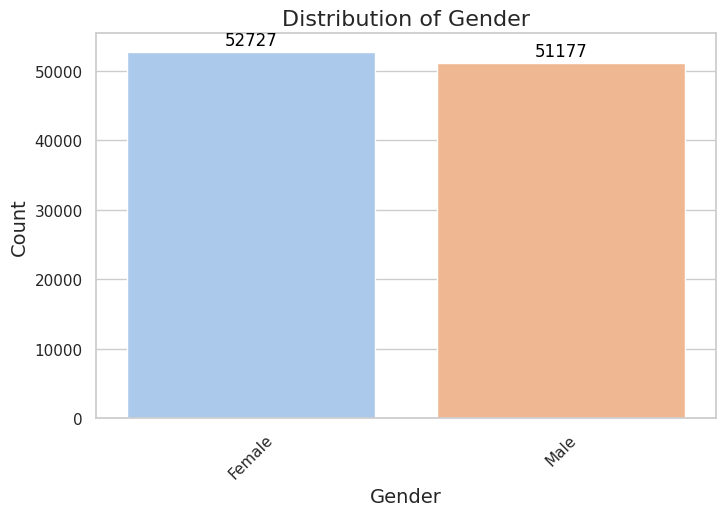

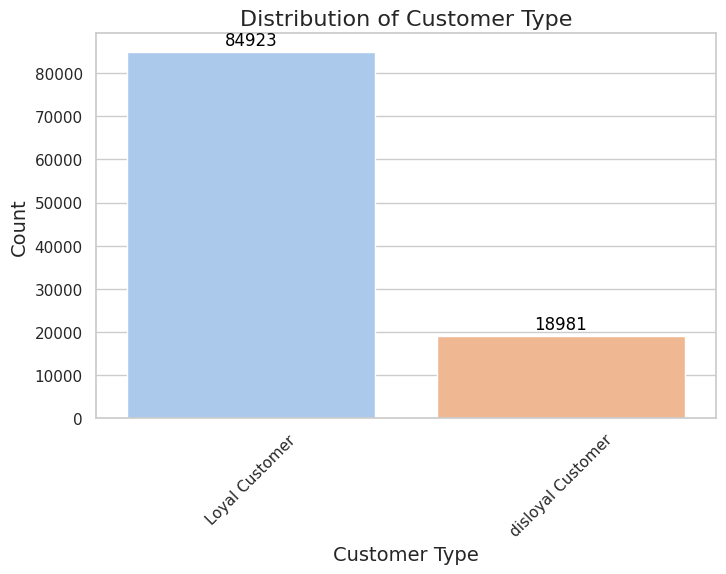

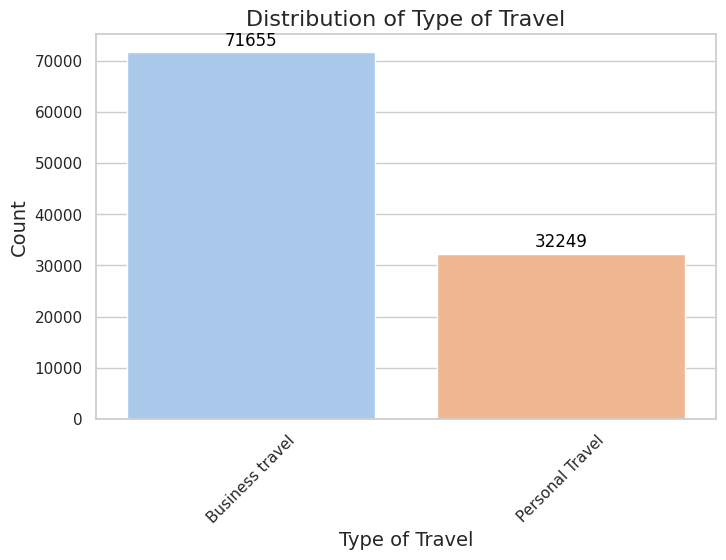

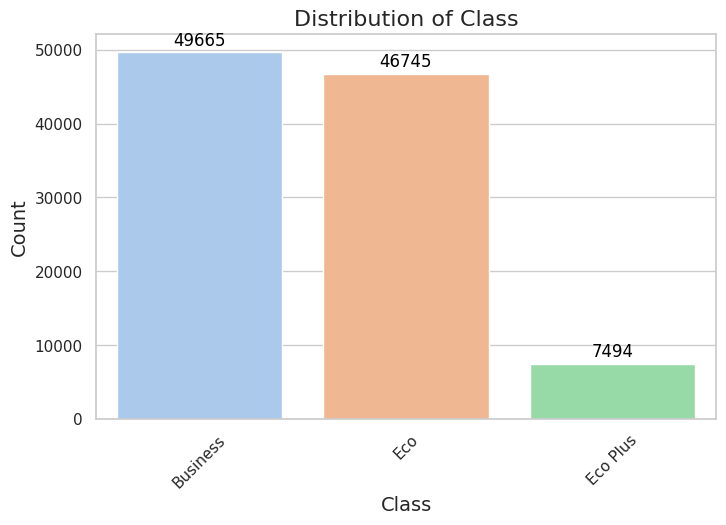

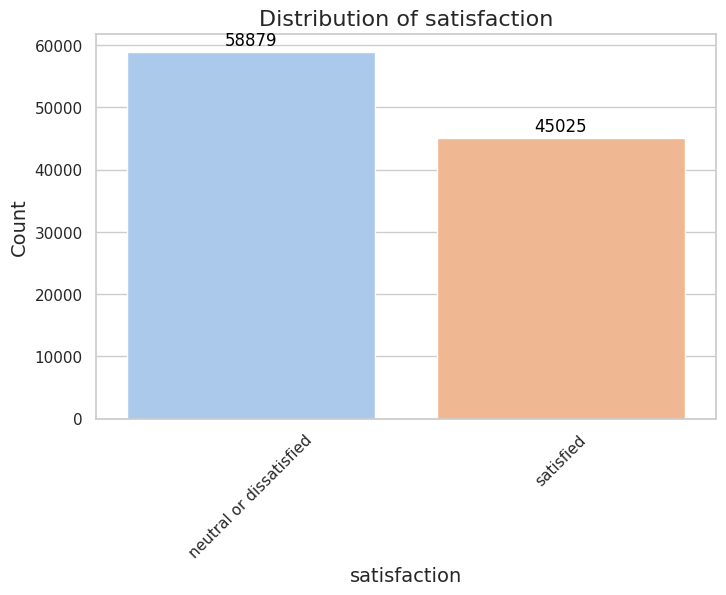

In [33]:
# Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Set plot style
sns.set(style="whitegrid")

# Create barplots
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, hue=col, dodge=False, palette="pastel", legend=False)
    
    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='baseline',
            fontsize=12, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    # Set titles and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

#### EDA: Numerical Variables

## Data Cleaning & Preprocessing
* Handle missing values
* Omitting columns not needed for modeling